# India's Wealth Index analysis 
**Using DHS2015-16 datasets from https://dhsprogram.com/topics/wealth-index/**

Variables Explanations:
<li>variable hv001    "Cluster number"
<li>variable hv007    "Year of interview"
<li>variable hv270    "Wealth index"
<li>variable hv271    "Wealth index factor score (5 decimals)"
<li>variable sv270s   "Wealth index within state"
<li>variable sv270u   "Wealth index - urban"
<li>variable sv271u   "Wealth index factor score (5 decimals) - urban"
<li>variable sv270us  "Wealth index - urban within state"
<li>variable sv270r   "Wealth index - rural"
<li>variable sv271r   "Wealth index factor score (5 decimals) - rural"
<li>variable sv270rs  "Wealth index - rural within state"
<li>URBAN_RURA = The cluster's Urban (U) and Rural (R) DHS sample classification.
<li>LATNUM = The cluster's latitude coordinate in decimal degrees.
*NOTE:  Clusters marked as "MIS" will have coordinates of 0, 0.
<li>LONGNUM = The cluster's longitude coordinate in decimal degrees.
*NOTE:  Clusters marked as "MIS" will have coordinates of 0, 0.
<li>ALT_GPS = The cluster's elevation/altitude (in meters) recorded from the GPS receiver.
*NOTE: If this information is not available, this field will be "9999".
<li>ALT_DEM = The cluster's elevation/altitude (in meters) from the SRTM (Shuttle Radar Topography Mission) DEM (Digital Elevation Model) for the specified coordinate location.
*NOTE: Elevations are regularly spaced at 30-arc seconds or approximately 1 kilometer (http://dds.cr.usgs.gov/srtm/version1/SRTM30).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Load data
df = pd.read_csv('wealth_geo.csv', index_col=None)
df.head()

,Unnamed: 0,hv001,hv007,hv270,hv271,sv270s,sv270u,sv271u,sv270us,sv270r,sv271r,sv270rs,LATNUM,LONGNUM,URBAN_RURA,ALT_GPS,ALT_DEM,geometry
0,0,10001,2015,middle,37639,poorer,poorer,-47278.0,poorest,NaN,NaN,NaN,11.670645,92.745799,U,9999.0,16.0,POINT (92.74579928369999 11.6706448114)
1,1,10001,2015,richer,74391,middle,poorer,-3057.0,poorer,NaN,NaN,NaN,11.670645,92.745799,U,9999.0,16.0,POINT (92.74579928369999 11.6706448114)
2,2,10001,2015,richer,98762,richer,middle,26266.0,middle,NaN,NaN,NaN,11.670645,92.745799,U,9999.0,16.0,POINT (92.74579928369999 11.6706448114)
3,3,10001,2015,richer,85569,middle,middle,10393.0,poorer,NaN,NaN,NaN,11.670645,92.745799,U,9999.0,16.0,POINT (92.74579928369999 11.6706448114)
4,4,10001,2015,middle,-11234,poorest,poorest,-106084.0,poorest,NaN,NaN,NaN,11.670645,92.745799,U,9999.0,16.0,POINT (92.74579928369999 11.6706448114)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601509 entries, 0 to 601508
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  601509 non-null  int64  
 1   hv001       601509 non-null  int64  
 2   hv007       601509 non-null  int64  
 3   hv270       601509 non-null  object 
 4   hv271       601509 non-null  int64  
 5   sv270s      601509 non-null  object 
 6   sv270u      175946 non-null  object 
 7   sv271u      175946 non-null  float64
 8   sv270us     175946 non-null  object 
 9   sv270r      425563 non-null  object 
 10  sv271r      425563 non-null  float64
 11  sv270rs     425563 non-null  object 
 12  LATNUM      601509 non-null  float64
 13  LONGNUM     601509 non-null  float64
 14  URBAN_RURA  601509 non-null  object 
 15  ALT_GPS     601509 non-null  float64
 16  ALT_DEM     601509 non-null  float64
 17  geometry    601509 non-null  object 
dtypes: float64(6), int64(4), object(8)
memory us

### Understand data set shape and data types

In [4]:
df.describe()

,Unnamed: 0,hv001,hv007,hv271,sv271u,sv271r,LATNUM,LONGNUM,ALT_GPS,ALT_DEM
count,601509.000000,601509.000000,601509.000000,601509.000000,175946.000000,425563.000000,601509.000000,601509.000000,601509.000000,601509.000000
mean,300754.000000,204006.579501,2015.497333,-0.000770,-0.000301,-0.000275,23.566596,81.005828,9559.534848,433.374204
std,173640.835872,102858.962829,0.499993,99782.669753,100000.000085,99999.998873,5.703226,8.380136,2027.463777,816.350761
min,0.000000,10001.000000,2015.000000,-240323.000000,-381732.000000,-202599.000000,0.000000,0.000000,0.000000,-5.000000
25%,150377.000000,120852.000000,2015.000000,-82547.000000,-61327.750000,-80030.000000,21.220337,76.531411,9999.000000,92.000000
50%,300754.000000,200457.000000,2015.000000,-6518.000000,13908.500000,-12679.000000,24.769370,79.496638,9999.000000,228.000000
75%,451131.000000,291705.000000,2016.000000,78310.000000,74571.500000,67764.000000,27.096034,85.512878,9999.000000,474.000000
max,601508.000000,360482.000000,2016.000000,300055.000000,221927.000000,376758.000000,34.847342,97.050089,9999.000000,9999.000000


In [5]:
df.describe(include=['object','bool'])

,hv270,sv270s,sv270u,sv270us,sv270r,sv270rs,URBAN_RURA,geometry
count,601509,601509,175946,175946,425563,425563,601509,601509
unique,5,5,5,5,5,5,2,28394
top,poorest,poorest,poorest,poorest,poorest,poorest,R,POINT (0 0)
freq,131728,136973,40994,39464,88503,95190,425563,2776


In [6]:
df['hv001'].nunique()

28524

In [7]:
# Number of clusters
df['hv001'].max() - df['hv001'].min()

350481

In [8]:
df['hv270'].unique()

array(['middle', 'richer', 'richest', 'poorer', 'poorest'], dtype=object)

In [9]:
df['geometry'].nunique()

28394

In [10]:
type(df['geometry'][0])

str

In [11]:
df.groupby('hv007')['URBAN_RURA'].value_counts()

hv007  URBAN_RURA
2015   R             214812
       U              87547
2016   R             210751
       U              88399
Name: URBAN_RURA, dtype: int64

There is significant increase in urban areas from year 2015 to 2016

In [12]:
# Number of areas classified as Urban more in 2016 than 2015
(df.query('hv007 in "2016"')['URBAN_RURA']=='U').value_counts()[1] - (df.query('hv007 in "2015"')['URBAN_RURA']=='U').value_counts()[1]

852

In [13]:
#pip install git+git://github.com/geopandas/geopandas.git

In [14]:
import geopandas
from shapely.geometry import Point, Polygon


In [15]:
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.LONGNUM, df.LATNUM))

In [16]:
gdf.head()

,Unnamed: 0,hv001,hv007,hv270,hv271,sv270s,sv270u,sv271u,sv270us,sv270r,sv271r,sv270rs,LATNUM,LONGNUM,URBAN_RURA,ALT_GPS,ALT_DEM,geometry
0,0,10001,2015,middle,37639,poorer,poorer,-47278.0,poorest,NaN,NaN,NaN,11.670645,92.745799,U,9999.0,16.0,POINT (92.74580 11.67064)
1,1,10001,2015,richer,74391,middle,poorer,-3057.0,poorer,NaN,NaN,NaN,11.670645,92.745799,U,9999.0,16.0,POINT (92.74580 11.67064)
2,2,10001,2015,richer,98762,richer,middle,26266.0,middle,NaN,NaN,NaN,11.670645,92.745799,U,9999.0,16.0,POINT (92.74580 11.67064)
3,3,10001,2015,richer,85569,middle,middle,10393.0,poorer,NaN,NaN,NaN,11.670645,92.745799,U,9999.0,16.0,POINT (92.74580 11.67064)
4,4,10001,2015,middle,-11234,poorest,poorest,-106084.0,poorest,NaN,NaN,NaN,11.670645,92.745799,U,9999.0,16.0,POINT (92.74580 11.67064)


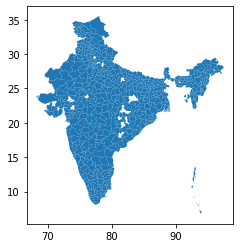

In [26]:
# shape file of India's districts
import geopandas as gpd
from shapely.geometry import Point, Polygon


fp = "full_india_districts.shp"
map_df = gpd.read_file(fp)
map_df.plot();

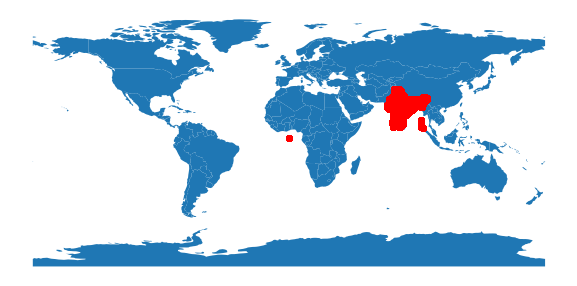

In [18]:
#To make sure all data is available for whole India
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


ax = world.plot(figsize=(20,5))
ax.axis('off')
# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

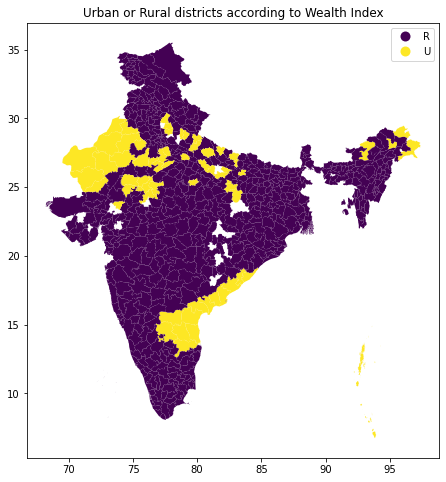

In [31]:
#map_df = map_df.join(df['URBAN_RURA']) 
map_df.plot(column='URBAN_RURA', cmap='viridis', figsize=[10,8], legend=True);
plt.title('Urban or Rural districts according to Wealth Index');